In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

[0 1 2 0 1 2 0 1 2]
[[0 1 2]
 [0 1 2]
 [0 1 2]]


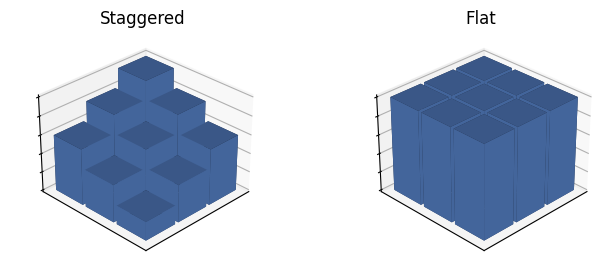

In [28]:
fig = plt.figure(figsize=(8,3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

linear_x = np.arange(3)
linear_y = np.arange(3)
xx, yy = np.meshgrid(linear_x, linear_y)
x = xx.ravel()
y = yy.ravel()

staggered_height = x + y + 1
flat_height = np.full_like(x, 1.0)
bottom = np.zeros_like(x)
width = 0.9
depth = 0.9

ax1.bar3d(x, y, bottom, width, depth, staggered_height, shade=True)
ax1.view_init(30, -135)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_zticklabels([])
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("Staggered")

ax2.bar3d(x, y, bottom, width, depth, flat_height, shade=True)
ax2.view_init(30, -135)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_zticklabels([])
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Flat")

plt.show()